KMeans - Silhouette Score: 0.45690842513029617


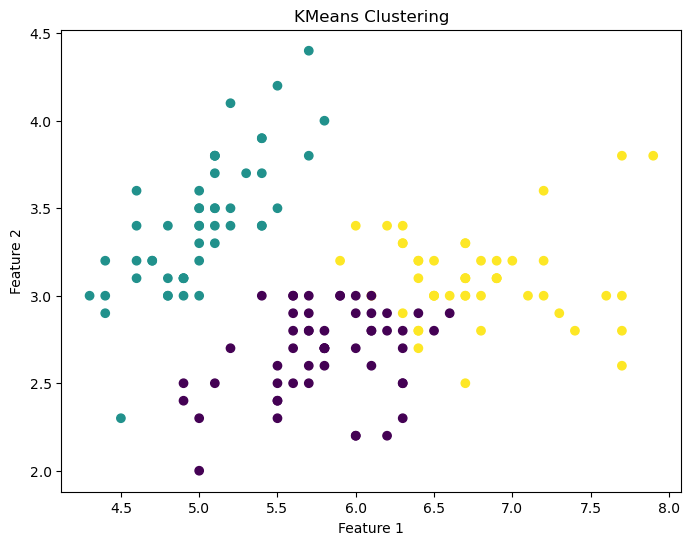

Agglomerative - Silhouette Score: 0.4434332901380025


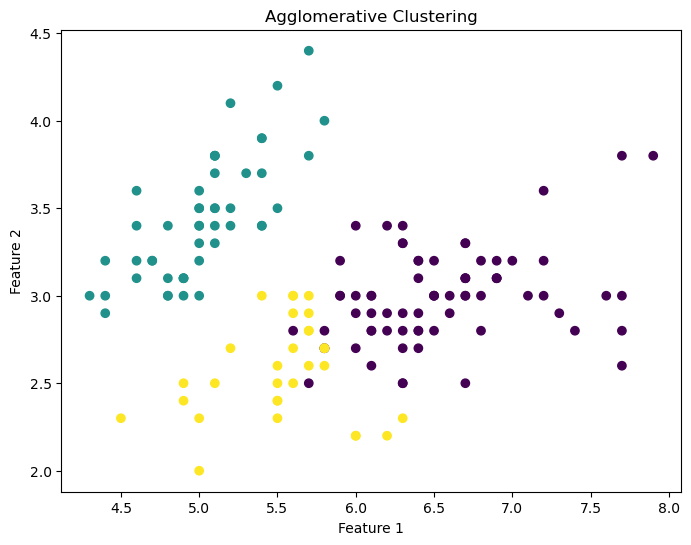

DBSCAN - Silhouette Score: 0.346057568779967


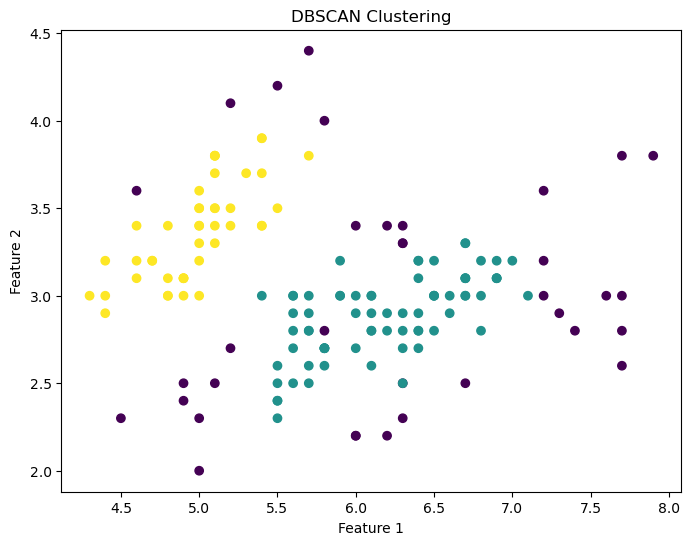

MeanShift - Silhouette Score: 0.5789751639440326


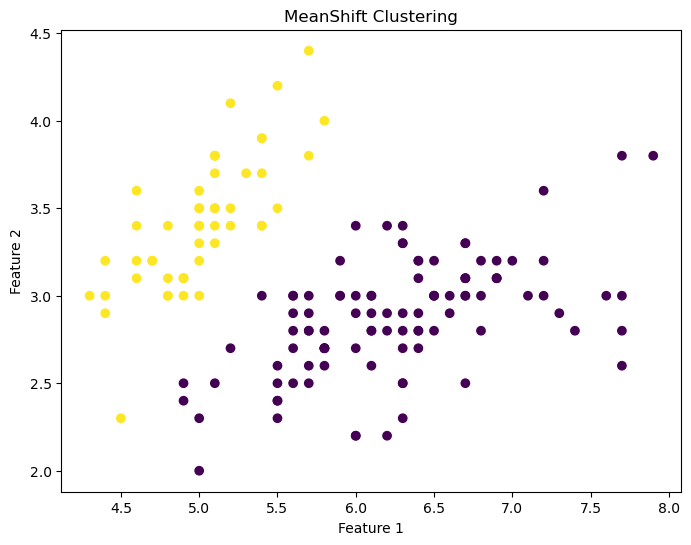

In [6]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train_path = "./iris.arff"
data = pd.read_csv(train_path, skiprows=18)

# Separate features and labels
X_data = data.iloc[:, :-1].values
Y_data = data.iloc[:, -1].values

# Standardize the features
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

# Define clustering algorithms
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "MeanShift": MeanShift(),
}

# Apply each clustering algorithm
for name, algorithm in clustering_algorithms.items():
    algorithm.fit(X_data_scaled)
    labels = algorithm.labels_
    silhouette_avg = silhouette_score(X_data_scaled, labels)
    print(f"{name} - Silhouette Score: {silhouette_avg}")

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis')
    plt.title(f"{name} Clustering")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()